<h1 style="background-color:rgb(67, 77, 86);
           font-size:300%;
           font-style: oblique;
           color:white;
           text-align:center;
           margin: auto;
           padding: 20px;">Predicting Bank Churners</h1>

<h2 style="background-color:rgb(141, 153, 165);
           font-size:250%;
           color:white;
           text-align:center;
           margin: auto;
           padding: 10px;">Chapter 2: Explanatory Data Analysis - Pt 1</h2>

*Note: Chapter 2 is broken into two parts. Pt 2 picks up from Distribution by Churn $\Rightarrow$ Categorical Features.*

<h2 style='font-size:180%;'>
    Table of Contents
</h2>

* [Exploratory Data Analysis](#3)
    * [Libraries](#3.1)
    * [Data Loading](#3.2)
    * [Data Visualization](#3.3)
      * [Histograms](#3.3.1)
      * [Box Plots](#3.3.2)
      * [Scatter Plots](#3.3.3)
      * [Distribution by Churn](#3.3.4)
        * [Numerical Features](#3.3.4.1)
        * [Categorical & Discrete Numerical Features](#3.3.4.2)
        * [Variance to Baseline](#3.3.4.3)

<a id='3'>
    <h2 style='background-color:rgb(141, 153, 165);
               font-size:240%;
               color:white;
               text-align:center;
               margin: auto;
               padding: 10px;'>
        Explanatory Data Analysis
    </h2>
</a>

<a id='3.1'>
    <h2 style='font-size:210%;'>
        Libraries</h2></a>

In [1]:
# general
import pandas as pd
import numpy as np
import random as rd
import copy

# data visualization
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import chart_studio.plotly
from pandas.plotting import scatter_matrix

# settings
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

# saving
import os
# for dirname, _, filenames in os.walk("source"):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

<a id='3.2'>
    <h2 style='font-size:210%;'>
        Data Loading</h2></a>

In [2]:
# load data
d = pd.read_csv('source/d_orig.csv')
d_num = pd.read_csv('source/d_num.csv')

<a id='3.3'>
    <h2 style='font-size:210%;'>
        Data Visualization</h2></a>

<a id='3.4.1'>
    <h2 style='font-size:180%;'>
        Histograms</h2></a>

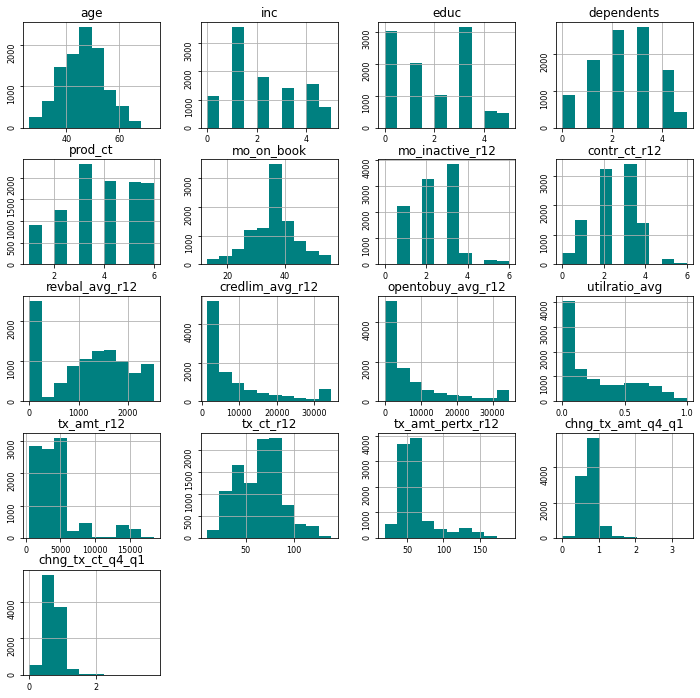

In [3]:
# histograms
plt.rc('figure',figsize=(12,12))
var_list = ['age', 'inc', 'educ', 'dependents', 
            'prod_ct', 'mo_on_book', 'mo_inactive_r12',
            'contr_ct_r12', 'revbal_avg_r12', 'credlim_avg_r12', 'opentobuy_avg_r12', 
            'utilratio_avg', 'tx_amt_r12', 'tx_ct_r12', 'tx_amt_pertx_r12',
            'chng_tx_amt_q4_q1', 'chng_tx_ct_q4_q1']
d_num[var_list].hist(xlabelsize=8, ylabelsize=8, yrot=90, color='teal')
plt.show()

<a id='3.4.2'>
    <h2 style='font-size:180%;'>
        Box Plots</h2></a>

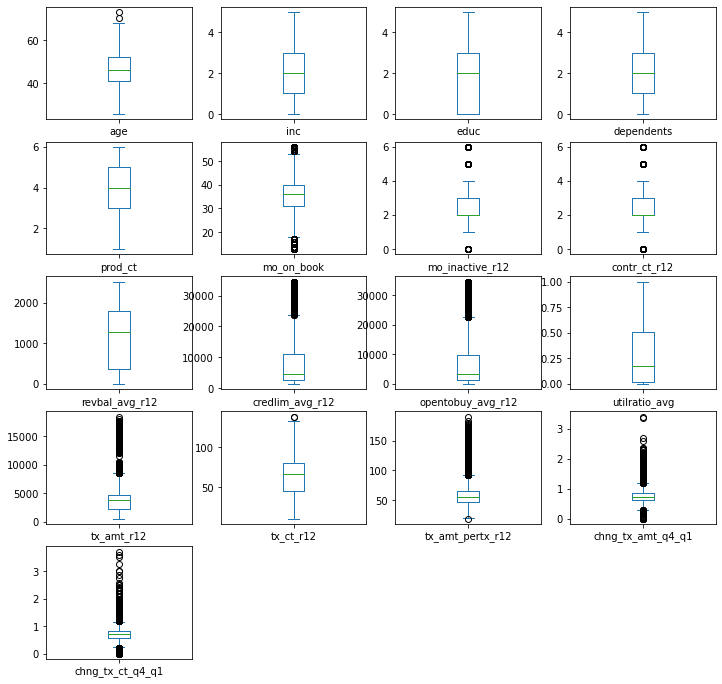

In [4]:
# box and whisker plots
plt.rc('figure',figsize=(12,12))
var_list = ['age', 'inc', 'educ', 'dependents', 
            'prod_ct', 'mo_on_book', 'mo_inactive_r12',
            'contr_ct_r12', 'revbal_avg_r12', 'credlim_avg_r12', 'opentobuy_avg_r12', 
            'utilratio_avg', 'tx_amt_r12', 'tx_ct_r12', 'tx_amt_pertx_r12',
            'chng_tx_amt_q4_q1', 'chng_tx_ct_q4_q1']
d_num[var_list].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.show()

<a id='3.4.3'>
    <h2 style='font-size:180%;'>
        Scatter Plots</h2></a>

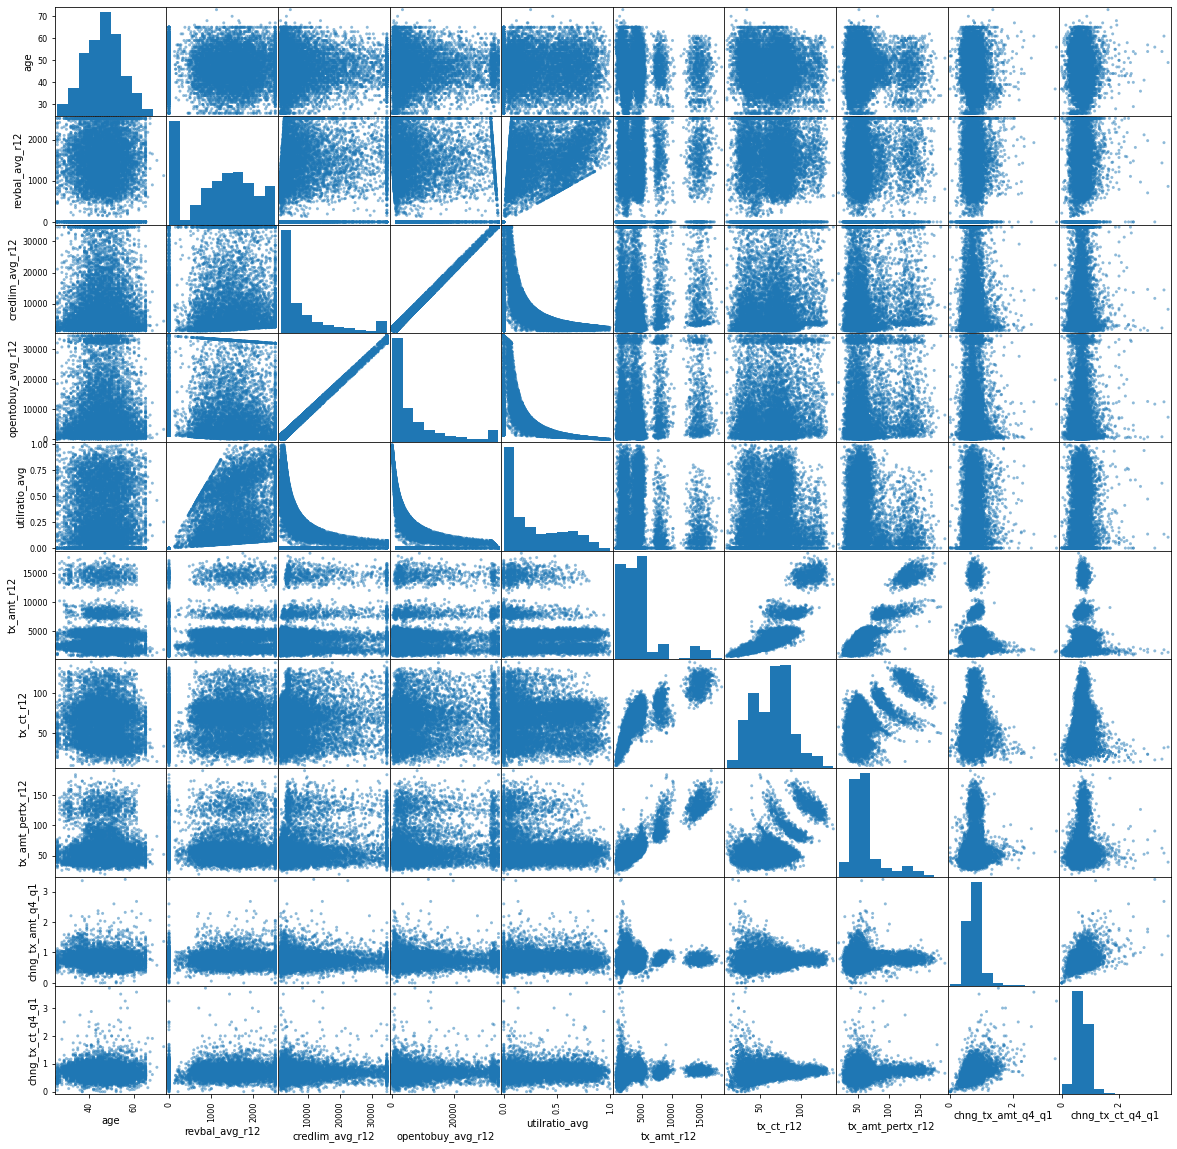

In [5]:
# from pandas.plotting import scatter_matrix
plt.rc('figure',figsize=(20,20))
var_list = ['age', 'revbal_avg_r12', 'credlim_avg_r12', 'opentobuy_avg_r12', 
            'utilratio_avg', 'tx_amt_r12', 'tx_ct_r12', 'tx_amt_pertx_r12',
            'chng_tx_amt_q4_q1', 'chng_tx_ct_q4_q1']
scatter_matrix(d_num[var_list])
plt.show()

<a id='3.3.4'>
    <h2 style='font-size:180%;'>
        Distribution by Churn</h2></a>

<a id='3.3.4.1'>
    <h2 style='font-size:150%;'>
        Numerical Features</h2></a>

First it is important to note that the data is highly imbalanced as with most churn prediction problems. Only 16% of customers have churned (minority class), and the rest 84% are active customers (majority class). For this reason, we will be employing data preparation and modeling techniques specifically suited for imbalanced classification tasks.

In [6]:
px.pie(data_frame=d, names='churn', 
       title='Proportion of Attrited to Existing Customers', 
       color_discrete_sequence=["rgb(68, 130, 155)","rgb(64, 60, 115)"],
#        color_discrete_map={"Existing Customer":"rgb(68, 130, 155)",
#                            "Attrited Customer":"rgb(64, 60, 115)"},
       labels={'churn':'Customer Type'},
       opacity=.8, hole=0.33, width=700, height=700*(5/8))

In [7]:
def plot_distr_num(var_num, display_name, barmode='overlay'):
    fig = px.histogram(d, x=d[var_num], color='churn', marginal='box',
                       title=f'Distribution of {display_name} by Churn Status',
                       width=800,
                       height=500,
                       labels={var_num: display_name,  
                               'churn': 'Customer Type'},
                       opacity=0.5,
                       color_discrete_map={
                           'Attrited Customer':'rgb(64, 60, 115)',
                           'Existing Customer':'rgb(68, 130, 155)'},
                       category_orders={
                           'Churn':['Attrited Customer','Existing Customer']},
                       hover_data=d[['age', 'gender', 'educ_cat', 'inc_cat']])
    fig.update_layout(legend=dict(orientation="h",
                                  yanchor="bottom", y=1,
                                  xanchor="right", x=0.99),
                      barmode=barmode,
                      title_text=f'Distribution of {display_name} by Churn Status')
    fig.show()

`Age` looks moderately normal for both classes with the median age of 46-47. Most customers (IQR) are in their 40s, and the existing customer group seems to have more outliers compared to the attrited customer group. Judging from the class distributions, `age` alone does not seem to show explanatory power in determining churn.

In [8]:
plot_distr_num('age', 'Age')

Most customers have 2 dependents with the IQR ranging from 1 to 3 for the existing customer group. Judging from the class distributions, `dependents` alone does not seem to show explanatory power in determining churn.

In [9]:
plot_distr_num('dependents', 'Number of Dependents')

Most existing customers hold more number of products compared to the majority of attrited customers, and the IQR is larger for attrited customers, ranging from 2 to 5. Majority of customers hold 3 or more products. As the IQR is overlapping, `prod_ct` alone shows little explanatory power in determining churn.

In [10]:
plot_distr_num('prod_ct', 'Number of Products')

Regardless of customer type, most customers were on book for 3 years. Due to the high concentration of customers at 3 years, I suspect some sort of a systematic override or an existence of an incentive/disincentive to be loyal for at least 3 years. Let's take a closer look at its kurtosis.

The Fisher's kurtosis (ie. the excess kurtosis) of 0.4 represents a leptokurtic distribution where the tails of the distributions are heavier compared to a Gaussian distribution. This means the coefficient of kurtosis is greater than 3, the coefficient of kurtosis of a Gaussian distribution. Another distinction from a Gaussian distribution is the peaks indicating the presence of a cluster at month 36. I suspect this feature would be useful as a leptokurtic distribution implies that small changes are less frequent (low variability or explanatory power) due to the heavy cluster in the mean. There are also large fluctuations in the both extremes as can be noted in the heavy tails. For these reasons, `mo_on_book` alone does not seem to have much explanatory power.

In [11]:
print('Kurtosis of months on book is %.3f.' %d['mo_on_book'].kurt())

Kurtosis of months on book is 0.400.


In [12]:
plot_distr_num('mo_on_book', 'Months on Book')

The R12 average of the transaction count looks promising as the two distributions are visibly apart and the IQR for the two classes do not overlap. The distribution for existing customers look bimodal whereas that for attrited customers is unimodal.

In [13]:
plot_distr_num('tx_ct_r12', 'Transaction Ct, R12 Avg')

Histograms for other numerical variables did not show interesting patterns so they are omitted.